# Multiple Linear Regression.

## Step 1: Business Problem Understanding. 
- What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Data Collection.

In [6]:
sd = pd.read_csv("Advertising.csv")

sd.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [7]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [8]:
sd.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Step 3: Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)

on the basis of this data, how should you spend advertising money in the future? These general questions might lead you to more specific questions::
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales more?
4. What is the effect of each ad type on sales?
5. Can we predict sales if ad spendig is given?

In [10]:
sd.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


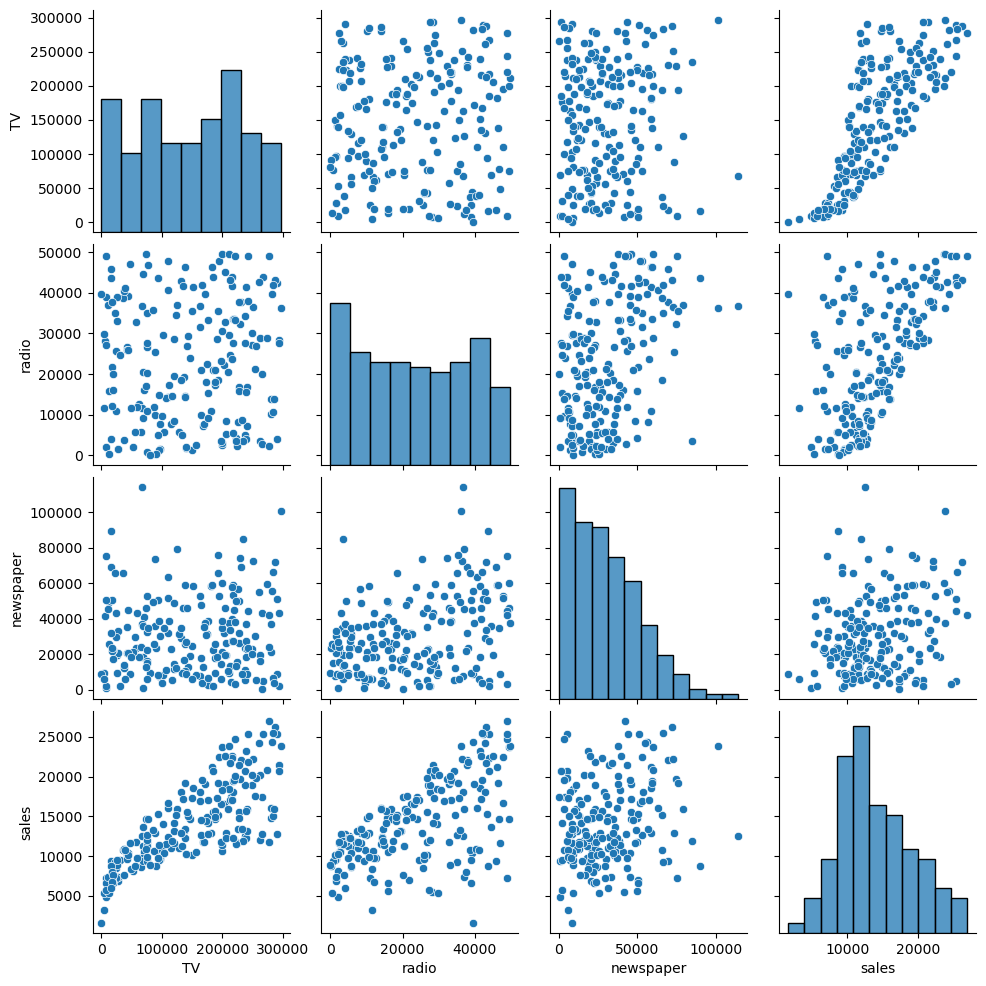

In [11]:
sns.pairplot(sd)

plt.show()

by observing the scatter plot (last line tv vs sales, radio vs sales, newspaper vs sales) we can assume that the relation btween sales and tv,radio and newspaper is linear. 

In [12]:
sd.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Note:
- The corelation between y and x should be high. The higher the corelation, better accuracy of predection.
- The relation between any two independent variables should be low.
- If the correlation between any two independent variables is strong it cause colinearity problem. 

### 3.2 Data Cleaning

### 3.3 Data Wrangling.

### 3.4 Train-Test Split

In [22]:
X = sd.drop(columns = "sales")    # X is a data from since we have three columns in it. 
y = sd["sales"]

In [23]:
X

,TV,radio,newspaper
0,230100,37800,69200
1,44500,39300,45100
2,17200,45900,69300
3,151500,41300,58500
4,180800,10800,58400
...,...,...,...
195,38200,3700,13800
196,94200,4900,8100
197,177000,9300,6400
198,283600,42000,66200


In [24]:
y

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

## Step 4: Modelling.
### 4.1 Selecting the ML technique to use

Multiple Linear Regression

- Linear regression include multiple input features. This is done by least squares method.
- y = β0 + β1x1 + ....+ βnxn
- - Each x represents a different feature and each feature has is own coefficient.

- In this case:
- - y = β0 + β1 X TV + β2 X Radio + β3 X Newspaper

In [27]:
from sklearn.linear_model import LinearRegression

sales_model = LinearRegression()

sales_model.fit(X_train,y_train)

LinearRegression()

In [28]:
sales_model.intercept_

2708.9490925159025

In [30]:
sales_model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

NOTe:: in the above the the order of values depends on the column order that you have in your X_train data. 

so its in TV, Radio, Newspaper in this example. 

### 4.2 Predictions

In [38]:
train_predictions = sales_model.predict(X_train)

In [39]:
test_predictions = sales_model.predict(X_test)

## Step 5: Evaluation of Model. 

### 5.1: Compare R2_test and R2_Train

In [42]:
 ## R2_test, R2_Train
from sklearn.metrics import r2_score
print("R2_Train:",r2_score(y_train,train_predictions))
print("R2_Test:",r2_score(y_test,test_predictions))

R2_Train: 0.9055159502227753
R2_Test: 0.8609466508230368


In [43]:
## We can also find R2_test, R2_train with following equations. 
sales_model.score(X_train,y_train)

0.9055159502227753

In [44]:
sales_model.score(X_test,y_test)

0.8609466508230368

## Step 6: Checklist
For any supervised machine learning algorithm.
1. Check whether model has overfitting or underfitting problem.
2. Is Test Accuracy = Cross Validation Score.
3. Check LINE Assumptions (Only for Linear Regression).
4. Check model meets the business problem requirements.
5. Finally, save the model and share to the deployment team.

#### 6.1 : Is the model under or verfited?
Answer:: Its a good model since both R2_test and R2_train are almost same. 

#### 6.2: Is test accuracy = cross validation score. 

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sales_model,X,y,cv=5)
print(scores)
scores.mean()

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


0.8871063495438435

#### 6.3: Check for LINE Assumptions. 

##### 6.3.1: Linearity of Errors

In [48]:
test_res = y_test - test_predictions

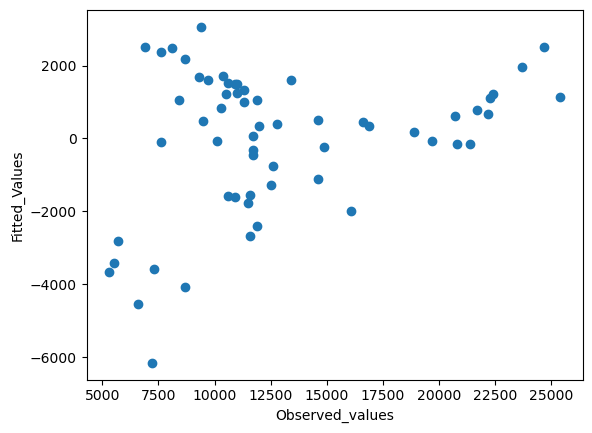

In [49]:
plt.scatter(y_test, test_res)
plt.xlabel("Observed_values")
plt.ylabel("Fitted_Values")
plt.show()

##### 6.3.2: Normality of Errors

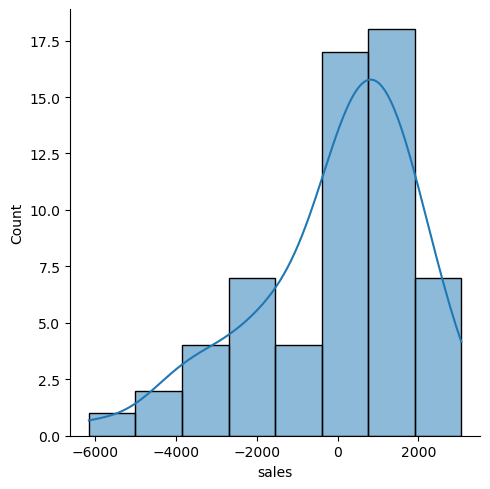

In [50]:
sns.displot(test_res,kde=True)

#plt.hist(test_res)

plt.show()

##### 6.3.3: Equal Variance of erros (Homoscadesicity)

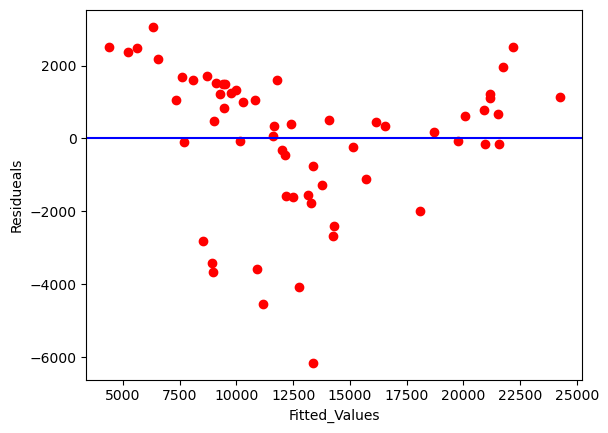

In [51]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("Fitted_Values")
plt.ylabel("Residueals")
plt.show()

##### 6.3.4: Variabes Significance (Independent Error).
Hypothesis testing for variables.
- H0: Average line is best fit line => There is no relationship between input variable and output variable (And thus β1 equal to zero)
- H1: Average line is not best fit line => There is a relationship between input variable and output variable (and thus β1 is not equal to zero)

In [53]:
import statsmodels.formula.api as smf
model2 = smf.ols("y~X",data=sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        19:14:12   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""